In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
data=pd.read_csv('https://raw.githubusercontent.com/omgo101/dataset-project/main/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#eda and visualization
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


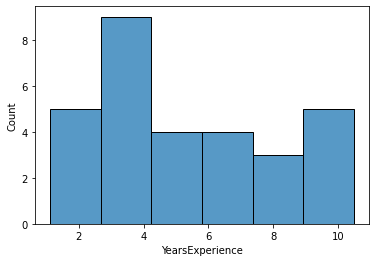

In [4]:
sns.histplot(data['YearsExperience'])

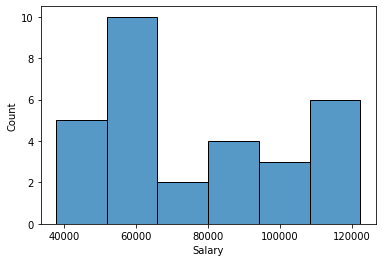

In [5]:
sns.histplot(data['Salary'])

# log and log squared ,boxcox tranformation

In [6]:
#calculating skewness for each column
for i,j in enumerate(data.columns): #to keep a count of iterations that time we use enumerate
  print(j)
  print(data[j].skew())
  for x in range(2):
    print("--------------------")

YearsExperience
0.37956024064804106
--------------------
--------------------
Salary
0.35411967922959153
--------------------
--------------------


In [18]:
x=np.log(data['Salary'])
x.skew()


-0.044126086756988495

In [19]:
x=np.sqrt(data['Salary'])
x.skew()

0.16904336802767353

In [ ]:
from scipy import stats 
#boxcox it will return two values first is skew and second is t value but we only want skewed values 
#thats why we have given [0] (out of the tuple we just want 0 index position)
x= stats.boxcox(data['Delivery Time'])[0]
pd.Series(x).skew()

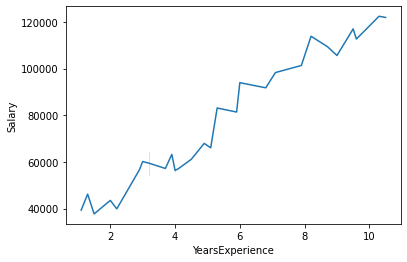

In [7]:
sns.lineplot(data=data,x="YearsExperience", y="Salary")

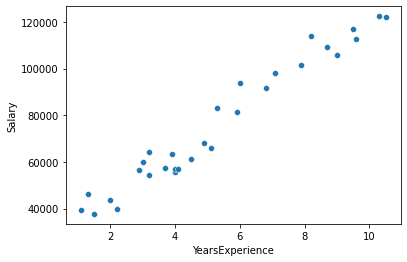

In [8]:
sns.scatterplot(data=data,x="YearsExperience", y="Salary")

In [9]:
#correlation analysis
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


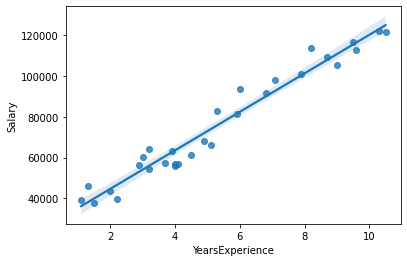

In [10]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [11]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [12]:
# Finding Coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [14]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [15]:
new_data=pd.Series([10,2])
new_data

0    10
1     2
dtype: int64

In [16]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,10
1,2


In [17]:
model.predict(data_pred)

0    120291.823413
1     44692.124842
dtype: float64